<a href="https://colab.research.google.com/github/SreejithPS93/Chest_XRay/blob/main/CNN_Chest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from pandas import DataFrame
import keras
from skimage import io
from PIL import Image

In [ ]:
import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X=[]
Y=[]
base_path='/content/drive/MyDrive/new'
source_path=base_path
for child in os.listdir(source_path):
  print(child)
  sub_path = os.path.join(source_path, child)
  bsub_path = os.path.join(base_path, child)
  if os.path.isdir(sub_path):
    for data_file in os.listdir(sub_path):
      Qry = Image.open(os.path.join(sub_path, data_file))
      Qry = Qry.convert("RGB")
      Qry = np.array(Qry.resize((224,224)))
      Qry = Qry.reshape([224,224,3])
      Qry = Qry[:,:,2]
      flist=np.array(Qry)
      X.append(flist)
      Y.append(child)


Covid
PNEUMONIA
NORMAL


In [ ]:
images_arr = np.asarray(X)
images_arr = images_arr.astype('float32')
images_arr.shape


(818, 224, 224)

In [ ]:
images_arr = images_arr.reshape(-1, 224,224, 1)
images_arr = images_arr / np.max(images_arr)

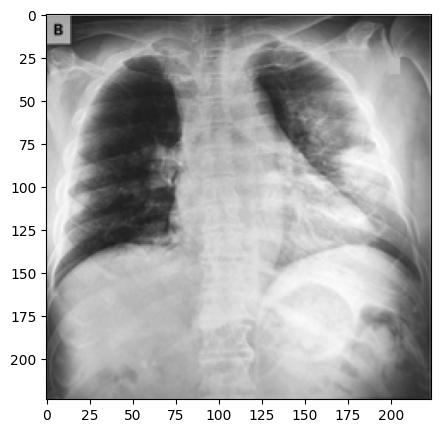

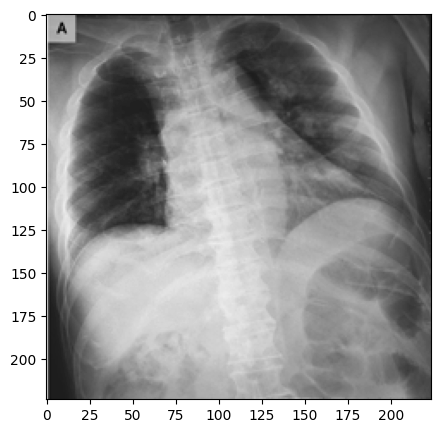

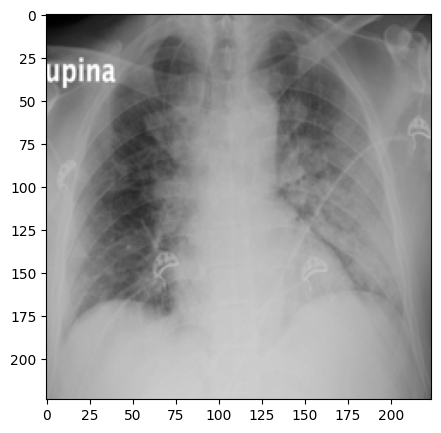

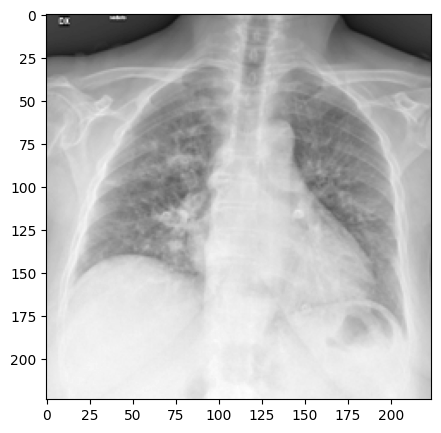

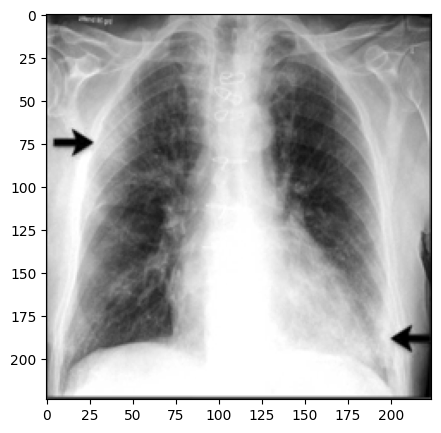

In [ ]:
# Display the first two images in training data
for i in range(5):
  plt.figure(figsize = [5,5])
  curr_img = np.reshape(images_arr[i], (224,224))
  plt.imshow(curr_img, cmap='gray')
  plt.show()


In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelBinarizer = LabelBinarizer()
y=labelBinarizer.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(images_arr,y,test_size=0.2,random_state =42,stratify=y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [ ]:
cnnModel= Sequential()
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu", input_shape=(224,224,1)))
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Flatten())
cnnModel.add(Dense(100,activation="relu"))
cnnModel.add(Dense(200,activation="relu"))
cnnModel.add(Dense(3,activation="softmax"))
cnnModel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 224, 224, 64)        │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 128)       │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 401408)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │      40,140,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             603 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,982,951 (156.34 MB)

 Trainable params: 40,982,951 (156.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnnModel.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])


In [ ]:
history = cnnModel.fit(X_train,y_train,epochs=30,batch_size=32,verbose=1,validation_split=0.15)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.4130 - loss: 2.3294 - val_accuracy: 0.7374 - val_loss: 0.7291
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 491ms/step - accuracy: 0.7602 - loss: 0.6409 - val_accuracy: 0.8586 - val_loss: 0.4225
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 493ms/step - accuracy: 0.7975 - loss: 0.4781 - val_accuracy: 0.8586 - val_loss: 0.3525
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 497ms/step - accuracy: 0.8328 - loss: 0.4111 - val_accuracy: 0.8586 - val_loss: 0.4387
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 499ms/step - accuracy: 0.8618 - loss: 0.3257 - val_accuracy: 0.9293 - val_loss: 0.2373
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 497ms/step - accuracy: 0.8893 - loss: 0.2682 - val_accuracy: 0.9394 - val_loss: 0.1586
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 492ms/step - accuracy: 0.9335 - loss: 0.1741 - val_accuracy: 0.9394 - val_loss: 0.1571
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 490ms/step - accuracy: 0.9723 - loss: 0.1153 - val_accurac

In [ ]:
testLoss, testAccuracy = cnnModel.evaluate(X_test,y_test)
print("Test Accuracy =", testAccuracy)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 745ms/step - accuracy: 0.9205 - loss: 1.2243
Test Accuracy = 0.9207317233085632


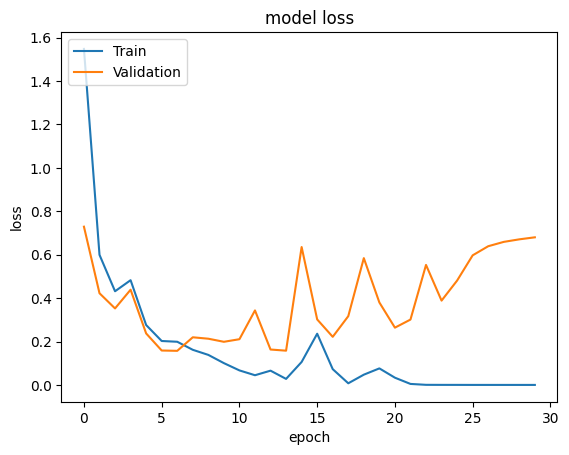

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

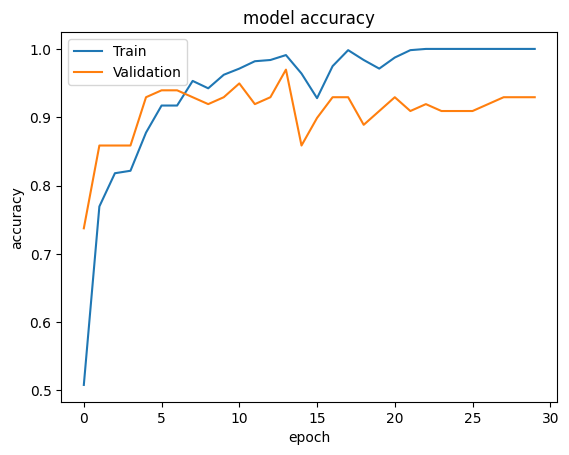

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
cnnModel.save('/content/drive/MyDrive/chest_xray_model.keras')